LOAN APPLICATION STATUS PREDICTION

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [112]:
#Reading dataset
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [113]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Checking samples to understand the dataset better
data.sample(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N
142,LP001504,Male,No,0,Graduate,Yes,6950,0.0,175.0,180.0,1.0,Semiurban,Y
154,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
159,LP001552,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
401,LP002296,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,N
459,LP002473,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N


In [7]:
#Checking shape 
data.shape

(614, 13)

In [8]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Only a few columns like ApplicantIncome, CoapplicantIncome, LoanAmount and Credit_History have int or float data type, remaining all columns have object type data. We can also see that few columns have missing values. Let's check the exact missing values for each feature

In [9]:
#Checking for exact null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Features like Gender, Married, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History have null values

In [10]:
#Checking unique values
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
data['Dependents'].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Credit_History'].unique()


array([ 1.,  0., nan])

In [14]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

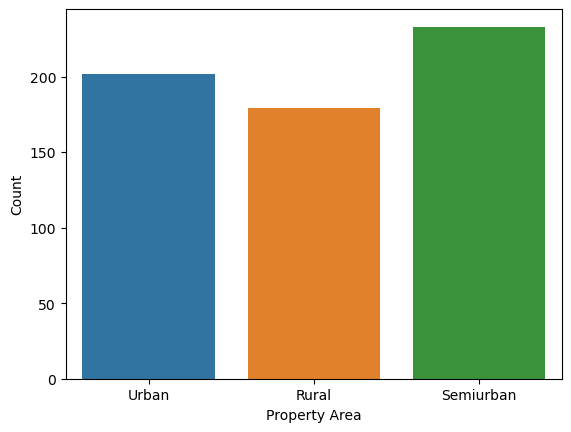

In [16]:
#Let's check the number of loan applicants Property area wise
sns.countplot(x='Property_Area', data=data)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

 Semi-Urban and Urban area has higher number of loan applicants in comparison to Rural Property Area

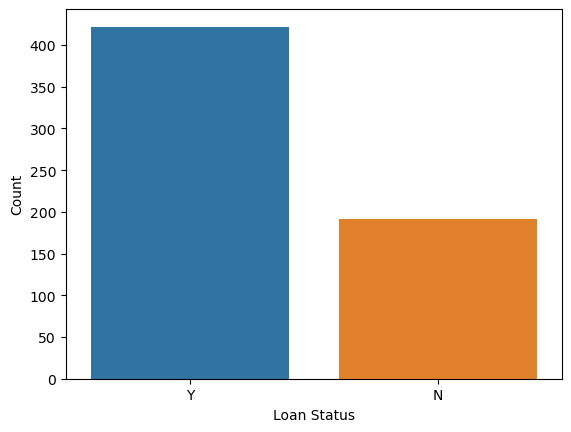

In [18]:
#Checking count of Loan Approval and Rejection
sns.countplot(x='Loan_Status', data=data)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

The number of applicants whose loan got approved is much higher than the number of applicants whose loan got rejected

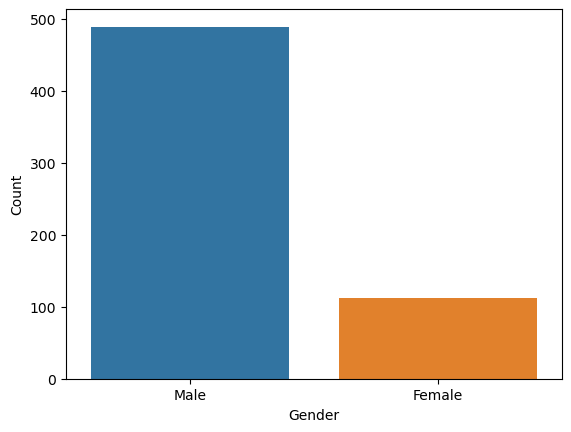

In [19]:
#Let's check Gaenderwise count of Loan applicants
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The number of loan applicants mostly comprises of Males. The number of Femal Loan applicants is much lpwers than Male Loan applicants

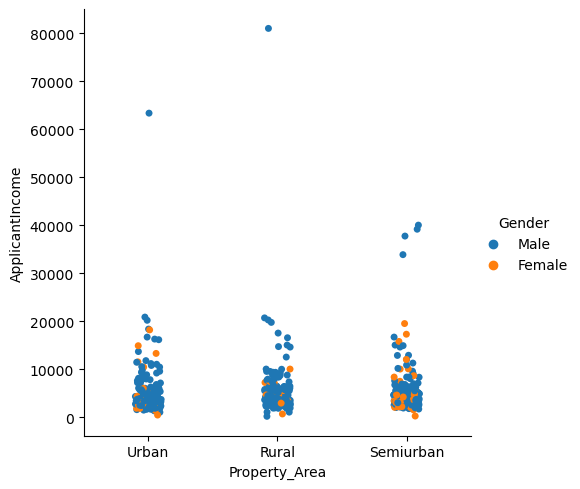

In [20]:
#Let's check Area wise income of applicants
sns.catplot(x='Property_Area', y='ApplicantIncome', data=data, hue='Gender')
plt.show()

It is evident that the population applying for loan comprises mostly of Male loan applicants. 

The lowest number of Female participation in loan activity is in Rural area and males have higher income in Rural area as compared to Females.

Semi urbal area has the highest number of Female loan applicants and females seem to have higher income as well.

Urban area comprises of both Male and Female population earning more or less the same.

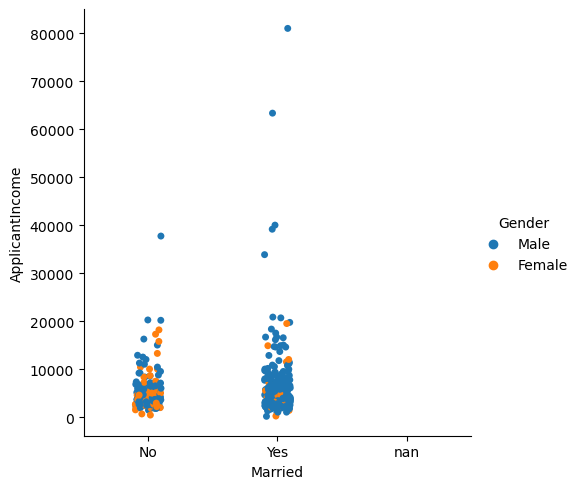

In [31]:
#Let's check Marital status wise income of applicants
sns.catplot(x='Married', y='ApplicantIncome', data=data, hue='Gender')
plt.show()

There are more number of unmarried female applicants. 

More married men have applied for loan and they also seem to have higher income.

Graduates have higher income as compared to Non-graduates

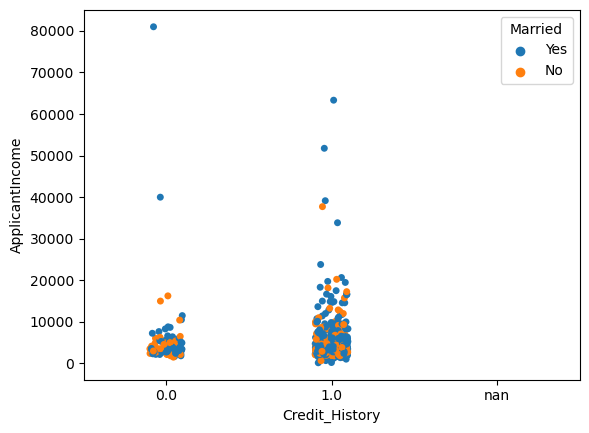

In [29]:
#Let's check incomewise Credit history of applicants
sns.stripplot(x='Credit_History', y='ApplicantIncome', data=data, hue='Married')
plt.show()

We can see that unmarried employess with income between $1000 to $1800 are more likely to be defaulters. 
Married employees with income between $1000 and higher are more likely to pay off debt.

In [32]:
#Let's gain more insights
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations-

1. There are null values

2. The range of standard deviation between 0.36 to 6109 implies to huge difference in the scale of data

3. Difference between 75% and max for ApplicantIncome, CoapplicantIncome and LoanAmount clearly indicate presence of outliers

In [116]:
#Replacing values, filling Nan values and changing data type for Dependents column
data['Dependents']=data['Dependents'].replace('3+',4)

In [117]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [118]:
data['Dependents']=data['Dependents'].astype(str).astype(int)

In [119]:
data['Dependents'].dtypes

dtype('int32')

In [120]:
#Let's handle null values first
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())




In [121]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


We have fixed the null values issue. Let's now work on converting the object data into integers


In [123]:
#Handling object type data
data['Gender']=data['Gender'].replace({'Male':0, 'Female':1})

In [124]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [125]:
data['Married']=data['Married'].replace({'No':0, 'Yes':1})
data['Education']=data['Education'].replace({'Graduate':1, 'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].replace({'No':0, 'Yes':1})
data['Property_Area']=data['Property_Area'].replace({'Rural':0,'Urban':1, 'Semiurban':2 })
data['Loan_Status']=data['Loan_Status'].replace({'N':0,'Y':1})



In [126]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [127]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

All the columns now have int or float data, object data type issue has been fixed. 

In [128]:
#Removing unnecessary columns
data.drop(columns=['Loan_ID'], axis=1, inplace=True)

In [129]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


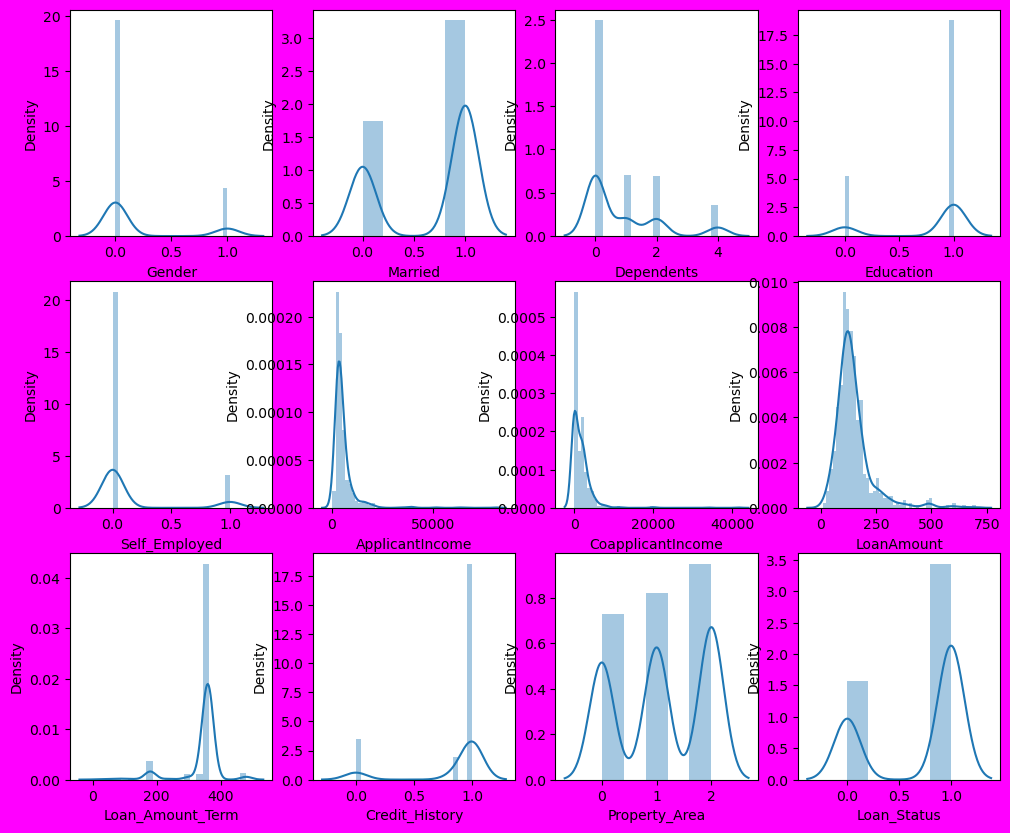

In [60]:
#Let's check data distribution
plt.figure(figsize=(12,10), facecolor='magenta')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()
        
        


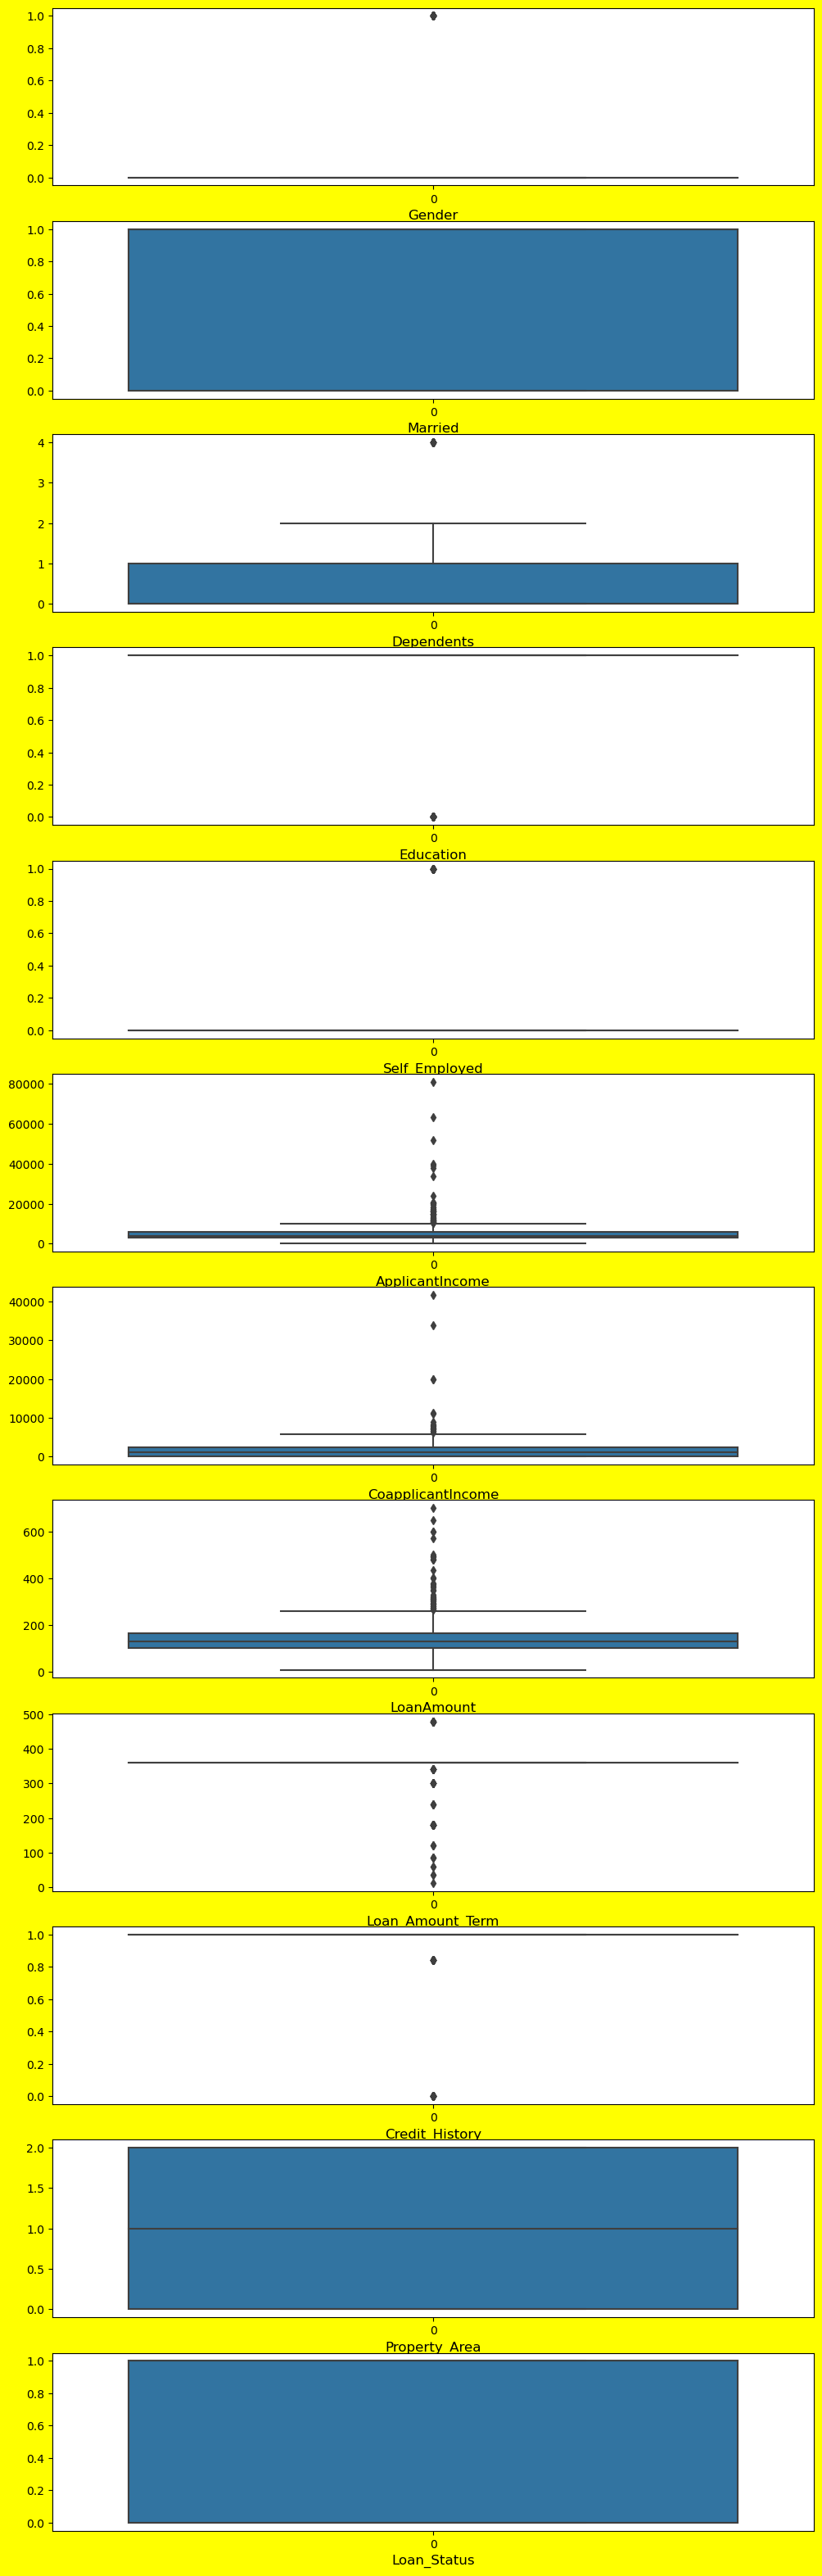

In [66]:
plt.figure(figsize=(12,40), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(12,1, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()    

    

ApplicantIncome and CoapplicantIncome variables have many outliers on higher side and Loan_Amount, Loan_Amount_Term has both higher and lower side outliers

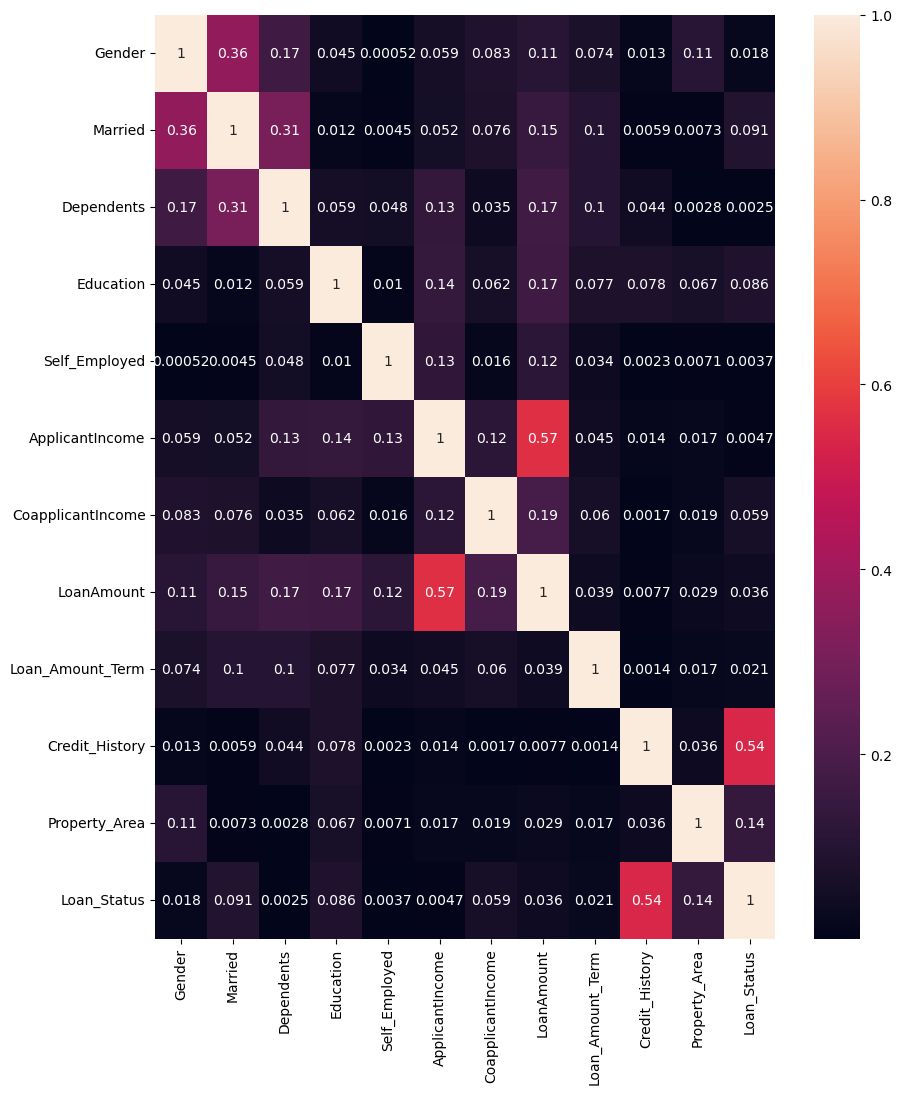

In [68]:
#Let's check if there is correlation between features-
data_corr=data.corr().abs()
plt.figure(figsize=(10,12))
sns.heatmap(data_corr, annot=True, annot_kws={'size':10})
plt.show()


There seems to be no correlation between features. Credit_History seems to impact Loan_Status the most among all features. 

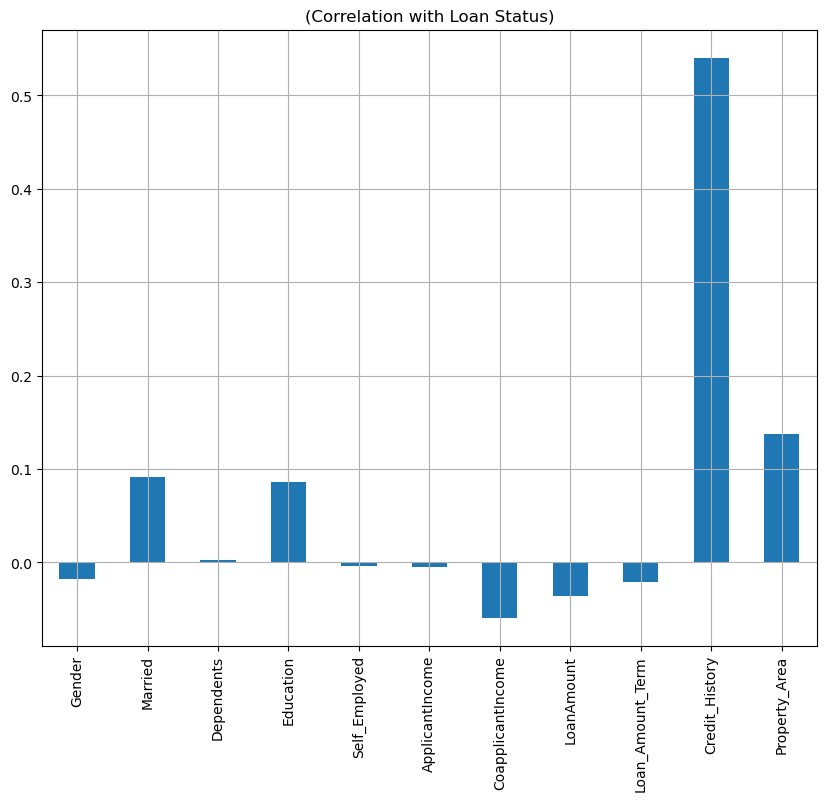

In [93]:
#Let's validatec relationship between each feature and the label
data.drop('Loan_Status',axis=1).corrwith(data['Loan_Status']).plot(kind='bar',grid=True,figsize=(10,8),title="(Correlation with Loan Status)")
plt.show()

In [130]:
#Dependents feature seems to be least impacting the status of loan. Hence, it should be eliminated
data.drop(columns=['Dependents'],axis=1, inplace=True)

In [131]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [133]:
#Removing Outliers
from scipy.stats import zscore

In [137]:
z_score=zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)
filt_ent=(abs_z_score<3.2).all(axis=1)
data=data[filt_ent]

In [140]:
data.shape

(581, 11)

In [141]:
#Separating features and label
X=data.drop(columns=['Loan_Status'], axis=1)
y=data['Loan_Status']

In [142]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 581, dtype: int64

In [143]:
#Data Scaling
from sklearn.preprocessing import StandardScaler

In [144]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [145]:
X_scaled

array([[-0.47511935, -1.36457648,  0.53954714, ...,  0.23853533,
         0.45456146, -0.09683974],
       [-0.47511935,  0.73282811,  0.53954714, ...,  0.23853533,
         0.45456146, -1.31996782],
       [-0.47511935,  0.73282811,  0.53954714, ...,  0.23853533,
         0.45456146, -0.09683974],
       ...,
       [-0.47511935,  0.73282811,  0.53954714, ...,  0.23853533,
         0.45456146, -0.09683974],
       [-0.47511935,  0.73282811,  0.53954714, ...,  0.23853533,
         0.45456146, -0.09683974],
       [ 2.10473432, -1.36457648,  0.53954714, ...,  0.23853533,
        -2.38214308,  1.12628833]])

In [146]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split


In [147]:
X_train, X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25, random_state=42)

In [148]:
y_train

23     0
439    1
119    1
91     1
432    1
      ..
73     0
109    1
283    1
456    1
105    1
Name: Loan_Status, Length: 435, dtype: int64

MODEL BUILDING


In [171]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [187]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [188]:
y_pred1=lr.predict(X_test)
acc=accuracy_score(y_test,y_pred1)
prec=precision_score(y_test,y_pred1)
rec=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [189]:
results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918     0.8125  0.981132  0.888889


In [175]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [176]:
for k in range(3,6):
    cv_score=cross_val_score(lr, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.8107027758488684


 at 4, cross validation score is 0.8089395370807747


 at 5, cross validation score is 0.8141173003241968




In [177]:
#Using SVC
from sklearn.svm import SVC

In [190]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [191]:
y_pred2=svc.predict(X_test)
acc=accuracy_score(y_test,y_pred2)
prec=precision_score(y_test,y_pred2)
rec=recall_score(y_test,y_pred2)
f1=f1_score(y_test,y_pred2)

In [192]:
model_results=pd.DataFrame([['SVC',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436


In [181]:
for k in range(3,6):
    cv_score=cross_val_score(svc, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.6901874899845094


 at 4, cross validation score is 0.6901865847897969


 at 5, cross validation score is 0.690185676392573




In [182]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [193]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [194]:
y_pred3=knn.predict(X_test)
acc=accuracy_score(y_test,y_pred3)
prec=precision_score(y_test,y_pred3)
rec=recall_score(y_test,y_pred3)
f1=f1_score(y_test,y_pred3)

In [195]:
model_results=pd.DataFrame([['KNN',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)


                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436
2                  KNN  0.821918   0.833333  0.943396  0.884956


In [196]:
for k in range(3,6):
    cv_score=cross_val_score(knn, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.6144347702223883


 at 4, cross validation score is 0.631660368445914


 at 5, cross validation score is 0.6195991747715885




In [197]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [198]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [199]:
y_pred4=dt.predict(X_test)
acc=accuracy_score(y_test,y_pred4)
prec=precision_score(y_test,y_pred4)
rec=recall_score(y_test,y_pred4)
f1=f1_score(y_test,y_pred4)

In [200]:
model_results=pd.DataFrame([['DT',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436
2                  KNN  0.821918   0.833333  0.943396  0.884956
3                   DT  0.698630   0.822917  0.745283  0.782178


In [206]:
for k in range(3,6):
    cv_score=cross_val_score(dt, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.7280504958780692


 at 4, cross validation score is 0.729782711384034


 at 5, cross validation score is 0.7090922487474212




In [202]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)


RandomForestClassifier()

In [204]:
y_pred5=rfr.predict(X_test)
acc=accuracy_score(y_test,y_pred5)
prec=precision_score(y_test,y_pred5)
rec=recall_score(y_test,y_pred5)
f1=f1_score(y_test,y_pred5)

In [205]:
model_results=pd.DataFrame([['RFR',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436
2                  KNN  0.821918   0.833333  0.943396  0.884956
3                   DT  0.698630   0.822917  0.745283  0.782178
4                  RFR  0.828767   0.829268  0.962264  0.890830


In [207]:
for k in range(3,6):
    cv_score=cross_val_score(dt, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.7297598062781546


 at 4, cross validation score is 0.7520784128483704


 at 5, cross validation score is 0.7194223401119954




In [208]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [209]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [210]:
y_pred6=gbc.predict(X_test)
acc=accuracy_score(y_test,y_pred6)
prec=precision_score(y_test,y_pred6)
rec=recall_score(y_test,y_pred6)
f1=f1_score(y_test,y_pred6)

In [211]:
model_results=pd.DataFrame([['GBC',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436
2                  KNN  0.821918   0.833333  0.943396  0.884956
3                   DT  0.698630   0.822917  0.745283  0.782178
4                  RFR  0.828767   0.829268  0.962264  0.890830
5                  GBC  0.808219   0.814516  0.952830  0.878261


In [212]:
for k in range(3,6):
    cv_score=cross_val_score(gbc, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.7762761960721472


 at 4, cross validation score is 0.7693670288143599


 at 5, cross validation score is 0.7883141762452108




In [217]:
#Using XGBoost
!pip install xgboost

In [219]:
#Using XGBoost
import xgboost as xgb

In [220]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [221]:
y_pred7=xgb.predict(X_test)
acc=accuracy_score(y_test,y_pred7)
prec=precision_score(y_test,y_pred7)
rec=recall_score(y_test,y_pred7)
f1=f1_score(y_test,y_pred7)

In [222]:
model_results=pd.DataFrame([['XGB',acc,prec,rec,f1]],
                    columns=['Model','Accuracy','Precision','Recall','f1-score'])
results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  f1-score
0  Logistic Regression  0.821918   0.812500  0.981132  0.888889
1                  SVC  0.835616   0.820312  0.990566  0.897436
2                  KNN  0.821918   0.833333  0.943396  0.884956
3                   DT  0.698630   0.822917  0.745283  0.782178
4                  RFR  0.828767   0.829268  0.962264  0.890830
5                  GBC  0.808219   0.814516  0.952830  0.878261
6                  XGB  0.773973   0.811966  0.896226  0.852018


In [223]:
for k in range(3,6):
    cv_score=cross_val_score(xgb, X,y, cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross validation score is {cv_mean}")
    print("\n")

 at 3, cross validation score is 0.7780033117889001


 at 4, cross validation score is 0.7831365139348134


 at 5, cross validation score is 0.7780282935455349




In [224]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100,
                   accuracy_score(y_test,y_pred7)*100]})

In [225]:
final_data

,Models,ACC
0,LR,82.191781
1,SVC,83.561644
2,KNN,82.191781
3,DT,69.863014
4,RF,82.876712
5,GBC,80.821918
6,XGB,77.397260


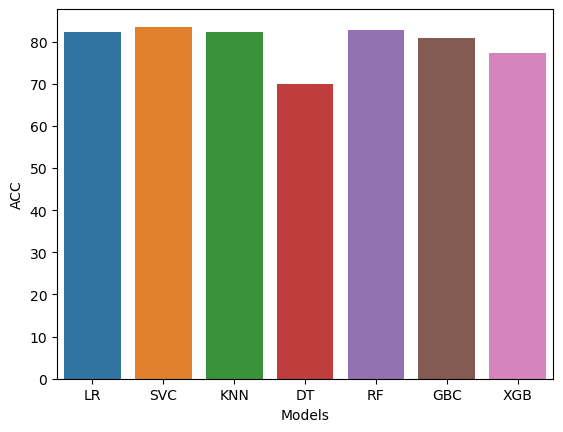

In [226]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

We can see that SVC model is yielding a score of 83.56% and the cross validation score at cv=3/4/5=69%.

For Logistic Regression model, accuracy score is 82.19% however the cross validation score at cv=5 is giving a score of 81.4%.

This proves that Logistic Regression model seems be a more generalized data which would work well on unseen data as well.

Even though SVC model is giving the highest accuracy score, we would be going with Logistic Regression model.

In [230]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [231]:
grid_param={
          'max_iter':[30,50, 80],
          'n_jobs':range(1,4),
          'random_state':range(10,50),
          'class_weight':['dict','balanced']}

In [233]:
grid_search=GridSearchCV(estimator=lr,
                        param_grid=grid_param,
                        cv=5)

In [234]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': [30, 50, 80], 'n_jobs': range(1, 4),
                         'random_state': range(10, 50)})

In [235]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'class_weight': 'balanced', 'max_iter': 30, 'n_jobs': 1, 'random_state': 10}


In [236]:
Final_model= LogisticRegression(class_weight='balanced', max_iter=30, n_jobs=1, random_state=10)

In [237]:
Final_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=30, n_jobs=1,
                   random_state=10)

In [238]:
y_pred=Final_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [239]:
print('Accuracy score',acc*100)
print('Precision score',prec*100)
print('Recall',rec*100)
print('f1-Score',f1*100)

Accuracy score 74.65753424657534
Precision score 81.65137614678899
Recall 83.9622641509434
f1-Score 82.7906976744186


We are getting the accuracy score of 74% when the actual model predicted score was 82%.

In [240]:
y_pred = Final_model.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'LR predicted': y_pred})

In [242]:
data1.sample(20)

,Actual,LR predicted
121,1,1
577,1,1
579,1,1
142,1,1
61,1,1
572,1,1
92,1,1
64,0,0
545,1,1
137,1,1


In [243]:
#saving and loading data
import joblib

In [244]:
joblib.dump(Final_model,"Loan Status")

['Loan Status']

In [245]:
model = joblib.load("Loan Status")